# Reading the Data

In [1]:
import numpy as np
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
import unicodedata

In [2]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [3]:
# Initialize an empty list to store the airline names
airline_names = []

# Set custom User-Agent in the headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36"
}

# Creating Web Links

In [4]:
# Loop through each letter of the alphabet (from A to Z)
for letter in range(ord('A'), ord('Z') + 1):
    l = chr(letter)  # Get the character corresponding to the current ASCII code (e.g., 'A' for 65, 'B' for 66, etc.)

    # Build the URL for the specific letter to fetch airline names starting with that letter
    url = f"https://www.airlinequality.com/review-pages/a-z-airline-reviews/#a2z-ldr-{l}"

    # Send an HTTP GET request to fetch the webpage's HTML content using the custom User-Agent in the headers
    html_text = requests.get(url, headers=headers).text

    # Parse the HTML content using BeautifulSoup with the "lxml" parser
    soup = BeautifulSoup(html_text, "lxml")

    # Create a unique identifier (URI) to locate the container for the current letter
    uri = f"a2z-ldr-{l}"

    # Find the container that holds the list of airlines starting with the current letter
    container = soup.find("div", {"id": uri})

    # Loop through each list item in the container and extract the airline name
    for items in container.find_all("li"):
        airline_names.append(items.text)

In [5]:
airline_names

['AB Aviation',
 'Adria Airways',
 'Aegean Airlines',
 'Aer Lingus',
 'Aero VIP',
 'Aerocaribbean',
 'Aeroflot Russian Airlines',
 'AeroItalia',
 'Aerolineas Argentinas',
 'Aeromar',
 'Aeromexico',
 'Aerosur',
 'Africa World Airlines',
 'Afriqiyah Airways',
 'Aigle Azur',
 'Air Algerie',
 'Air Antilles',
 'Air Arabia',
 'Air Astana',
 'Air Austral',
 'Air Bagan',
 'Air Belgium',
 'Air Berlin',
 'Air Botswana',
 'Air Burkina',
 'Air Busan',
 'Air Cairo',
 'Air Canada',
 'Air Canada rouge',
 'Air Caraibes',
 'Air China',
 'Air Corsica',
 'Air Costa',
 "Air Cote d'Ivoire",
 'Air Djibouti',
 'Air Dolomiti',
 'Air Europa',
 'Air France',
 'Air Greenland',
 'Air Iceland Connect',
 'Air India',
 'Air India Express',
 'Air Italy',
 'Air Juan',
 'Air KBZ',
 'Air Koryo',
 'Air Labrador',
 'Air Macau',
 'Air Madagascar',
 'Air Malawi',
 'Air Malta',
 'Air Mauritius',
 'Air Mediterranee',
 'Air Memphis',
 'Air Moldova',
 'Air Montenegro',
 'Air Namibia',
 'Air New Zealand',
 'Air Niugini',
 "Air N

In [6]:
# to convert names of airlines into url
start = "https://www.airlinequality.com/airline-reviews/"
end = "?sortby=post_date%3ADesc&pagesize=100"
airline_url = []
for items in airline_names:
    #converting names to lower case
    items = items.lower()
    # Replace special characters with their ASCII equivalents
    items = unicodedata.normalize('NFKD', items).encode('ASCII', 'ignore').decode('utf-8')
    # Replacing space with hyphen
    items = items.replace(" ", "-")
    #creating URL
    airline_url.append(start + items + "/"+end)

In [7]:
airline_url

['https://www.airlinequality.com/airline-reviews/ab-aviation/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/adria-airways/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aegean-airlines/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aer-lingus/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aero-vip/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aerocaribbean/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aeroflot-russian-airlines/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aeroitalia/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aerolineas-argentinas/?sortby=post_date%3ADesc&pagesize=100',
 'https://www.airlinequality.com/airline-reviews/aeromar/?sortby

In [8]:
df_airline = pd.DataFrame({"Name":airline_names, "Links":airline_url})
df_airline

,Name,Links
0,AB Aviation,https://www.airlinequality.com/airline-reviews...
1,Adria Airways,https://www.airlinequality.com/airline-reviews...
2,Aegean Airlines,https://www.airlinequality.com/airline-reviews...
3,Aer Lingus,https://www.airlinequality.com/airline-reviews...
4,Aero VIP,https://www.airlinequality.com/airline-reviews...
...,...,...
564,Yangon Airways,https://www.airlinequality.com/airline-reviews...
565,Yemenia,https://www.airlinequality.com/airline-reviews...
566,Yeti Airlines,https://www.airlinequality.com/airline-reviews...
567,Zambia Airways,https://www.airlinequality.com/airline-reviews...


In [9]:
columns = ["Aircraft","Type Of Traveller","Seat Type","Route","Date Flown","Seat Comfort","Cabin Staff Service","Food & Beverages","Ground Service","Inflight Entertainment","Wifi & Connectivity","Value For Money","Recommended"]

df_columns = ["Airline Name","Overall_Rating","Review_Title","Review Date","Verified","Review","Aircraft","Type Of Traveller","Seat Type","Route","Date Flown","Seat Comfort","Cabin Staff Service","Food & Beverages","Ground Service","Inflight Entertainment","Wifi & Connectivity","Value For Money","Recommended"]

# Scraping Airline Data

In [10]:
reviews = []

# Loop through each row in the 'df_airline' DataFrame
for index, row in df_airline.iterrows():
    # Send an HTTP GET request to fetch the HTML content of the airline's review page
    html = requests.get(row['Links'], headers=headers).text
    bs = BeautifulSoup(html, "html.parser")

    # Find the container that holds the airline's review information
    container = bs.find("article", {"class": "comp comp_reviews-airline querylist position-content"})

    # Check if the container exists (i.e., the review page is valid)
    if container:
        # Extract the airline's name from the 'Name' column of the DataFrame
        print(row['Name'])

        # Loop through each review article in the container and extract relevant details
        for items in container.find_all("article"):
            verified = False
            # Extract the overall rating from the review
            rating = items.find("div", {"class": "rating-10"})
            if rating:
                rating = rating.text.strip()[:1]
            else:
                rating = None

            # Extract the review title from the review
            title = items.find("h2")
            if title:
                title = title.text
            else:
                title = None

            # Extract the review date from the review
            time = items.find("h3").find("time")
            if time:
                time = time.text
            else:
                time = None
            # Extract the review content from the review
            text = items.find("div", {"class": "text_content"}).text
            text = text.split("|")
            if len(text) == 1:
                review = text[0]
            else:
                if text[0] == '✅ Trip Verified ':
                    verified = True
                review = text[1]

            # Extract ratings for specific categories from the review
            table = items.find("table")
            tab = [None] * 13
            for item in table.find_all("tr"):
                i = 0
                for td in item.find_all("td"):
                    if i == 0:
                        condition = td.text
                        # Finding index of the given condition in the 'columns' list
                        ind = columns.index(condition)
                        i = 1
                    else:
                        # Checking if it's a rating or not
                        if td.find("span") is None:
                            value = td.text
                            tab[ind] = value
                        # In case it's a rating, counting stars filled (i.e., stars given)
                        else:
                            value = 0
                            for star in td.find_all("span", {"class": "star fill"}):
                                value += 1
                            tab[ind] = value

            # Store the extracted review data in a list named 'data'
            data = [row['Name'], rating, title, time, verified, review] + tab
            reviews.append(data)

# The 'reviews' list now contains all the extracted review data for different airlines.

AB Aviation
Adria Airways
Aegean Airlines
Aer Lingus
Aero VIP
Aerocaribbean
Aeroflot Russian Airlines
AeroItalia
Aerolineas Argentinas
Aeromar
Aeromexico
Aerosur
Africa World Airlines
Afriqiyah Airways
Aigle Azur
Air Algerie
Air Antilles
Air Arabia
Air Astana
Air Austral
Air Bagan
Air Belgium
Air Berlin
Air Botswana
Air Burkina
Air Busan
Air Cairo
Air Canada
Air Canada rouge
Air Caraibes
Air China
Air Corsica
Air Costa
Air Cote d'Ivoire
Air Djibouti
Air Dolomiti
Air Europa
Air France
Air Greenland
Air Iceland Connect
Air India
Air India Express
Air Italy
Air Juan
Air KBZ
Air Koryo
Air Labrador
Air Macau
Air Madagascar
Air Malawi
Air Malta
Air Mauritius
Air Mediterranee
Air Memphis
Air Moldova
Air Montenegro
Air Namibia
Air New Zealand
Air Niugini
Air North Yukon's Airline
Air Nostrum
Air Panama
Air Pegasus
Air Premia
Air Rarotonga
Air Senegal
Air Serbia
Air Seychelles
Air Tahiti Nui
Air Tanzania
Air Transat
Air Zimbabwe
AirAsia
AirAsia India
AirAsia Philippines
AirAsia X
AirAsia Zest
a

In [11]:
#creating reviews dataframe
df = pd.DataFrame(reviews, columns=df_columns)

In [12]:
df.sample(10)


,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
7523,CityJet,1,CityJet customer review,6th September 2014,False,Our flight Toulon - London was cancelled on 29...,None,None,Economy Class,None,None,1.0,1.0,1.0,NaN,1.0,NaN,1.0,no
10152,flydubai,3,“Very bad experience”,1st March 2024,False,Very bad experience with flydubai. They made...,None,Solo Leisure,Economy Class,Dubai to Ahmedabad,March 2024,2.0,1.0,1.0,1.0,1.0,1.0,1.0,no
5381,Azerbaijan Airlines,n,Azerbaijan Airlines customer review,14th August 2005,False,I flew Azerbaijan Airlines from Tel Aviv to Ba...,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
14897,Lynx Air,8,"""Overall we had a good experience""",27th November 2023,True,My daughter and I had a great experience wit...,None,Family Leisure,Economy Class,Toronto to Calgary,November 2023,3.0,5.0,NaN,3.0,NaN,NaN,5.0,yes
2298,Air Mauritius,1,“you should be ashamed of yourselves”,8th December 2023,True,Checked in online 24 hours before flight. Wel...,None,Couple Leisure,Economy Class,Mauritius to London Gatwick,December 2023,2.0,5.0,5.0,4.0,2.0,3.0,3.0,no
15998,Olympic Air,2,Olympic Air customer review,22nd September 2013,False,Our flight was scheduled for 1450hrs but we we...,None,None,Economy Class,None,None,3.0,2.0,0.0,NaN,0.0,NaN,3.0,no
255,Aer Lingus,9,"""Very positive experience""",27th June 2023,True,Cork to Dubrovnik return. Comfortable aircra...,A320,Family Leisure,Economy Class,Cork to Dubrovnik,June 2023,4.0,5.0,NaN,4.0,NaN,NaN,5.0,yes
14336,LIAT,n,LIAT customer review,17th September 2013,False,My husband and I paid extra for a non-stop fli...,None,None,Economy Class,None,None,1.0,1.0,0.0,NaN,0.0,NaN,1.0,no
2852,Air Serbia,2,"""Absolutely avoid""",5th September 2022,True,Bought a refundable ticket. Tried to get a re...,None,Solo Leisure,Premium Economy,Belgrade to Barcelona,August 2022,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
18862,Silver Airways,1,"""Won’t fly Silver again""",8th June 2023,True,Flight was delayed 10 hours and when trying ...,None,Solo Leisure,Economy Class,Huntsville to Orlando,May 2023,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no


In [13]:
df.shape

(24121, 19)

# Downloading the final DataFrame

In [14]:
df.to_csv('Airline_Reviews.csv')

In [15]:
from google.colab import files
files.download('Airline_Reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# EDA

In [16]:
!pip install vaderSentiment
!pip install prettytable

In [17]:
import pandas as pd
import numpy as np
import re
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from xgboost import XGBClassifier
import lightgbm as lgb
from prettytable import PrettyTable
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
df.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,None,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,None,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,None,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
file_path = '/content/drive/My Drive/capstone_airline_reviews3.xlsx'
df = pd.read_excel(file_path)

In [21]:
df.dropna(how='all', inplace=True)
df.dropna(subset=['overall'], inplace=True)
df.dropna(subset=['cabin_service', 'cabin', 'seat_comfort', 'food_bev', 'entertainment', 'value_for_money', 'ground_service'], how='all', inplace=True)
df.reset_index(drop=True, inplace=True)
df['overall'] = (df['overall'] - 1).astype(int)
df['overall'] = df['overall'].astype(str)
df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,6,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,1,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,2,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,9,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62449,Ukraine International,3,Christian Mueller,29th June 2010,Kiev - Frankfurt - Kiev weekly normally with L...,NaN,NaN,Business Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,yes
62450,Ukraine International,7,Joerg Lehnert,11th May 2010,Berlin-Kiev-Berlin B737-400. The return flight...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,yes
62451,Ukraine International,4,Y Kahanovych,10th May 2010,Some 5 flights within couple months. Most of t...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,no
62452,Ukraine International,7,H Ritzer,29th April 2010,Vienna-Kiev return in Coach. Check in fine at ...,NaN,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,yes


In [22]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d %B %Y')
    except ValueError:
        # Handle dates with ordinal numbers
        parts = date_str.split()
        day = parts[0]
        month = parts[1]
        year = parts[2]

        # Remove the ordinal suffix from the day
        day = int(day[:-2])

        # Convert month name to its numerical representation
        month_dict = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
            'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
        month = month_dict[month]

        return pd.to_datetime(f'{year}-{month:02d}-{day:02d}')

In [23]:
df['Review Date'] = df['review_date'].apply(parse_date)
df['Review Year'] = df['Review Date'].dt.year
year_counts = df['Review Year'].value_counts().sort_index()
year_counts

,count
Review Year,
2009,55
2010,500
2011,1261
2012,2345
2013,4709
2014,9963
2015,10920
2016,9248
2017,8834


In [24]:
df2 = pd.read_csv('/content/drive/My Drive/Airline_Reviews.csv').drop(['Unnamed: 0'], axis=1).drop_duplicates()
df2.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [25]:
df2['Year_Flown'] = df2['Date Flown'].fillna('None').apply(lambda x: x[-4:])
for col in ['Year_Flown']:
    df2[col] = df2[col].fillna('None')
year_counts = df2['Year_Flown'].value_counts().sort_index()
year_counts

,count
Year_Flown,
2012,1
2014,12
2015,863
2016,1090
2017,1065
2018,1552
2019,2452
2020,1037
2021,623


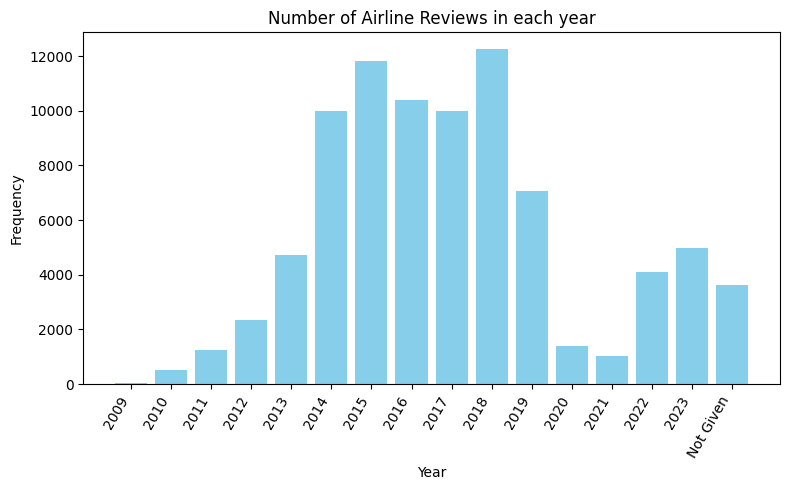

In [26]:
# adding all the counts from the 1st and 2nd datasets of years

x = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,np.nan]
y = [55,500,1261,2346,4709,9975,11809,10403,9994,12259,7057,1378,1022,4115,4980,3642]

# Replace NaN values with "Not Given"
x = [str(int(year)) if not np.isnan(year) else "Not Given" for year in x]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of Airline Reviews in each year')
plt.xticks(rotation=60, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
stopwords = set(stopwords.words('english'))

In [31]:
def remove_quotes(text):
    return re.sub(r'"', '', text)
def remove_stopwords(words):
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

stopwords.discard('not')

df2['Review_Title'] = df2['Review_Title'].apply(lambda x: x.lower())
df2['Review_Title'] = df2['Review_Title'].apply(remove_quotes)
df2['Review_Title'] = df2['Review_Title'].apply(lambda x: word_tokenize(x))
df2['Review_Title'] = df2['Review_Title'].apply(remove_stopwords)
df2['Review'] = df2['Review_Title']+df2['Review']
df2.drop(columns='Review_Title', inplace=True)

In [32]:
df3 = df[['airline','recommended', 'overall', 'customer_review', 'cabin', 'route', 'date_flown','seat_comfort', 'cabin_service', 'food_bev', 'entertainment','ground_service', 'value_for_money']]
df3.head()

,airline,recommended,overall,customer_review,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,Turkish Airlines,yes,6,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,no,1,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,no,2,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,yes,9,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,no,0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
df4 = df2[['Airline Name', 'Recommended', 'Overall_Rating', 'Review','Seat Type', 'Route', 'Date Flown','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages','Inflight Entertainment','Ground Service','Value For Money']]
df4.head()

,Airline Name,Recommended,Overall_Rating,Review,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money
0,AB Aviation,yes,9,pretty decent airline Moroni to Moheli. Turne...,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,NaN,4.0,3.0
1,AB Aviation,no,1,not good airline Moroni to Anjouan. It is a ve...,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,NaN,1.0,2.0
2,AB Aviation,no,1,flight fortunately short Anjouan to Dzaoudzi....,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,NaN,1.0,2.0
3,Adria Airways,no,1,never fly adria Please do a favor yourself an...,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,NaN,1.0,1.0
4,Adria Airways,no,1,ruined last days holidays Do not book a flight...,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0


In [34]:
new_column_names = ['Airline Name', 'Recommended', 'Overall_Rating', 'Review', 'Seat Type',
       'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service',
       'Food & Beverages', 'Inflight Entertainment', 'Ground Service',
       'Value For Money']
df3.columns = new_column_names
df5 = pd.concat([df3, df4], ignore_index=True)
df5['Recommended'].fillna('yes', inplace=True)
df5.head()

,Airline Name,Recommended,Overall_Rating,Review,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money
0,Turkish Airlines,yes,6,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,no,1,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,no,2,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,yes,9,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,no,0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0


In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86460 entries, 0 to 86459
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            86460 non-null  object 
 1   Recommended             86460 non-null  object 
 2   Overall_Rating          86460 non-null  object 
 3   Review                  86460 non-null  object 
 4   Seat Type               84603 non-null  object 
 5   Route                   60129 non-null  object 
 6   Date Flown              60105 non-null  object 
 7   Seat Comfort            79366 non-null  float64
 8   Cabin Staff Service     79181 non-null  float64
 9   Food & Beverages        66582 non-null  float64
 10  Inflight Entertainment  54568 non-null  float64
 11  Ground Service          58891 non-null  float64
 12  Value For Money         85349 non-null  float64
dtypes: float64(6), object(7)
memory usage: 8.6+ MB


In [36]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,79366.0,2.877580,1.459120,0.0,1.0,3.0,4.0,5.0
Cabin Staff Service,79181.0,3.137672,1.579933,0.0,1.0,3.0,5.0,5.0
Food & Beverages,66582.0,2.846730,1.501959,0.0,1.0,3.0,4.0,5.0
Inflight Entertainment,54568.0,2.733562,1.531002,0.0,1.0,3.0,4.0,5.0
Ground Service,58891.0,2.581175,1.617502,1.0,1.0,2.0,4.0,5.0
Value For Money,85349.0,2.839283,1.604247,0.0,1.0,3.0,4.0,5.0


In [37]:
df5['Recommended'].value_counts()

,count
Recommended,
no,47861
yes,38599


In [38]:
unique_airline_counts = df5['Airline Name'].value_counts()
unique_airline_counts

,count
Airline Name,
Spirit Airlines,2946
American Airlines,2871
United Airlines,2869
British Airways,2818
Cathay Pacific Airways,2452
...,...
NordStar,1
Nordic Regional Airlines,1
Grand Cru Airlines,1


In [39]:
df5.isnull().sum()

,0
Airline Name,0
Recommended,0
Overall_Rating,0
Review,0
Seat Type,1857
Route,26331
Date Flown,26355
Seat Comfort,7094
Cabin Staff Service,7279
Food & Beverages,19878


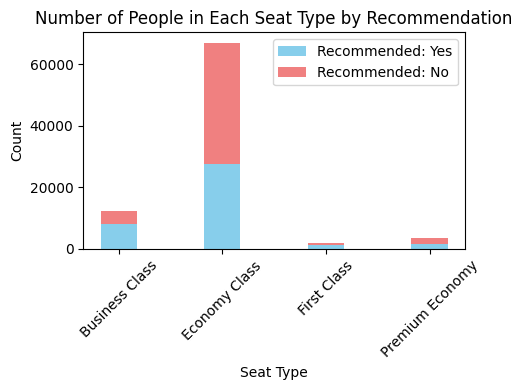

In [40]:
counts = df5.groupby(['Seat Type', 'Recommended']).size().unstack(fill_value=0)

plt.figure(figsize=(5, 4))
width = 0.35
x = range(len(counts.index))
plt.bar(x, counts['yes'], width, label='Recommended: Yes', color='skyblue')
plt.bar(x, counts['no'], width, label='Recommended: No', bottom=counts['yes'], color='lightcoral')
plt.title('Number of People in Each Seat Type by Recommendation')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.xticks(x, counts.index, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

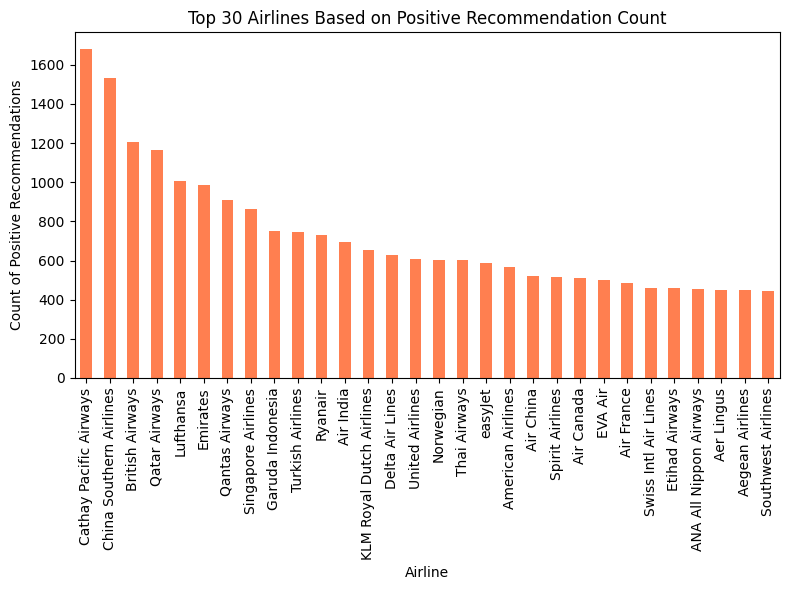

In [41]:
positive_recommendations = df5[df5['Recommended'] == 'yes']
airline_counts = positive_recommendations['Airline Name'].value_counts()
top_30_airlines = airline_counts.head(30)

plt.figure(figsize=(8, 6))
top_30_airlines.plot(kind='bar', color='coral')
plt.title('Top 30 Airlines Based on Positive Recommendation Count')
plt.xlabel('Airline')
plt.ylabel('Count of Positive Recommendations')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [42]:
positive_df = df5[df5['Recommended'] == 'yes']
max_df = positive_df[positive_df['Airline Name'] == 'Cathay Pacific Airways']
cathay_pacific_routes = max_df[max_df['Airline Name'] == 'Cathay Pacific Airways']['Route'].value_counts()
most_frequent_route = cathay_pacific_routes[cathay_pacific_routes > 15]
print("Route details for Cathay Pacific Airways:")
print(most_frequent_route)

Route details for Cathay Pacific Airways:
Route
Bangkok to Hong Kong    20
HKG to LHR              18
Manila to Hong Kong     18
Name: count, dtype: int64


In [43]:
airline_name = 'Cathay Pacific Airways'
route_name = 'HKG to LHR'
filtered_df = df5[(df5['Airline Name'] == airline_name) & (df5['Route'] == route_name)]
numeric_columns = filtered_df.select_dtypes(include=['int', 'float'])
average_ratings = numeric_columns.mean()
print("Average Ratings for each feature for best airline:")
print(average_ratings)

Average Ratings for each feature for best airline:
Seat Comfort              4.111111
Cabin Staff Service       4.555556
Food & Beverages          4.333333
Inflight Entertainment    4.444444
Ground Service            4.444444
Value For Money           3.777778
dtype: float64


In [67]:
"""
neg_recommendations = df5[df5['Recommended'] == 'no']
airline_counts = neg_recommendations['Airline Name'].value_counts()
top_30_airlines = airline_counts.head(30)

plt.figure(figsize=(8, 6))
top_30_airlines.plot(kind='bar', color='orange')
plt.title('Top 30 Airlines Based on Negative Recommendation Count')
plt.xlabel('Airline')
plt.ylabel('Count of Negative Recommendations')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()"""

"\nneg_recommendations = df5[df5['Recommended'] == 'no']\nairline_counts = neg_recommendations['Airline Name'].value_counts()\ntop_30_airlines = airline_counts.head(30)\n\nplt.figure(figsize=(8, 6))\ntop_30_airlines.plot(kind='bar', color='orange')\nplt.title('Top 30 Airlines Based on Negative Recommendation Count')\nplt.xlabel('Airline')\nplt.ylabel('Count of Negative Recommendations')\nplt.xticks(rotation=90)\nplt.tight_layout()\n\nplt.show()"

In [45]:
neg_df = df5[df5['Recommended'] == 'no']
max_df = neg_df[neg_df['Airline Name'] == 'Spirit Airlines']
spirit_airline_routes = max_df[max_df['Airline Name'] == 'Spirit Airlines']['Route'].value_counts()
most_frequent_route = spirit_airline_routes[spirit_airline_routes > 10]
print("Route details for Spirit Airlines:")
print(most_frequent_route)

Route details for Spirit Airlines:
Route
BOS to LAS              12
Seattle to Las Vegas    11
Detroit to Las Vegas    11
Orlando to Newark       11
Name: count, dtype: int64


In [46]:
airline_name = 'Spirit Airlines'
route_name = 'BOS to LAS'
filtered_df = df5[(df5['Airline Name'] == airline_name) & (df5['Route'] == route_name)]
numeric_columns = filtered_df.select_dtypes(include=['int', 'float'])
average_ratings = numeric_columns.mean()
print("Average Ratings for each feature for best airline:")
print(average_ratings)

Average Ratings for each feature for best airline:
Seat Comfort              1.153846
Cabin Staff Service       1.923077
Food & Beverages          1.777778
Inflight Entertainment    1.000000
Ground Service            1.428571
Value For Money           1.500000
dtype: float64


In [47]:
for i in ['yes','no']:
    recommended_reviews = df5[df5['Recommended'] == i]['Review']
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(recommended_reviews)
    tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    word_scores = tfidf_scores.sum().sort_values(ascending=False)
    top_25_words = word_scores.head(40)
    if(i=='yes'):
        print("Top 40 positive review words")
    else:
        print("Top 40 negative review words")
    print(top_25_words)
    print("__________________________________________________________________")

Top 40 positive review words
flight           2905.388797
good             1868.736191
service          1653.772115
time             1538.120823
crew             1444.525702
food             1396.667620
cabin            1283.473868
staff            1260.684902
seat             1236.262246
flights          1211.456377
seats            1197.435861
class            1102.439297
great            1073.164058
friendly         1072.062445
comfortable      1011.608874
airline           972.579768
excellent         957.865093
check             954.371966
business          945.241978
verified          939.070923
trip              935.735757
airlines          935.472398
âœ                916.336379
nice              904.062687
experience        880.062539
air               872.313092
plane             871.270889
economy           861.118184
new               855.159863
aircraft          832.956231
entertainment     826.668219
return            801.716789
boarding          792.521798
flew          

In [48]:
total_nan_count = df5['Seat Type'].isna().sum()
business_class_count = int(0.10 * total_nan_count)
nan_indices = df5.index[df5['Seat Type'].isna()].tolist()
random_indices = random.sample(nan_indices, business_class_count)
df5.loc[random_indices, 'Seat Type'] = 'Business Class'
df5['Seat Type'].fillna('Economy Class', inplace=True)

In [49]:
df5['Recommended'] = (df5['Recommended']=='yes').astype(int)
#df['Year_Flown'] = df['Date Flown'].fillna('None').apply(lambda x: x[-4:])
for col in ['Airline Name', 'Seat Type', 'Route']:
    df5[col] = df5[col].fillna('None')
df5 = df5.drop(['Date Flown'], axis=1)
df5.head(5)

,Airline Name,Recommended,Overall_Rating,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money
0,Turkish Airlines,1,6,âœ… Trip Verified | London to Izmir via Istanb...,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0
1,Turkish Airlines,0,1,âœ… Trip Verified | Istanbul to Bucharest. We ...,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0
2,Turkish Airlines,0,2,âœ… Trip Verified | Rome to Prishtina via Ista...,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0
3,Turkish Airlines,1,9,âœ… Trip Verified | Flew on Turkish Airlines I...,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0
4,Turkish Airlines,0,0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0


In [50]:
def convert(rating):
    if rating == 'n':
        return '0'
    else:
        return rating
df5['Overall_Rating'] = df5['Overall_Rating'].apply(lambda x: convert(x))
df5['Overall_Rating'].value_counts()

,count
Overall_Rating,
1,18073
0,17720
9,10193
8,9478
7,8234
2,6293
6,5157
3,3984
4,3910


In [51]:
analyzer = SentimentIntensityAnalyzer()
for i in range(5):
    text = df5['Review'][i]
    print(text)
    sentiment_scores = analyzer.polarity_scores(text)
    print(f"Sentiment Score: {round(sentiment_scores['compound']*10, 3)}")
    print("--------------------------------------------------------------------------------------------")

âœ… Trip Verified | London to Izmir via Istanbul. First time Iâ€™d flown TK. I found them very good in the air, cabin crew, planes, food, all very nice. Not so great on the ground, ground staff, call centre, computer systems. My flight from LHR was delayed so I missed the connection in Istanbul. Most ground staff donâ€™t speak English, and I was given contradictory instructions from those that could speak a little English. I eventually got on a flight to Izmir three hours later, but it wasnâ€™t an easy process, made worse by the vast distances one has to walk between gates in the cavernous new airport. Also, Iâ€™d phoned a TK call centre (based in Ukraine) to pay an extra Â£40 or so each way for extra leg room seats. However, as the departure times kept changing, my seats kept changing, and for the return leg to London from Istanbul I was not given an extra leg room seat. Luckily there was a spare exit row seat and the cabin crew sorted me out. Overall, I think their cabin crew and pla

In [52]:
df5['Sentiment_Score'] = df5.apply(lambda row: (analyzer.polarity_scores(row['Review'])['compound'])*10, axis=1)

In [53]:
percentage = (df5.query('Recommended == 1 and Sentiment_Score >= 5.0').shape[0] / df5.query('Recommended == 1').shape[0]) * 100
print(f"Percentage of rows where Recommended=1 and sentiment score is positive: {percentage:.2f}%")

Percentage of rows where Recommended=1 and sentiment score is positive: 85.95%


In [54]:
def replace_nan_with_median(col):
    median = df5[col].median()
    df5[col] = df5[col].fillna(median)
col_with_nan = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money']
[replace_nan_with_median(col) for col in col_with_nan]
df5['Seat Type'] = df5['Seat Type'].fillna('Economy Class')

In [55]:
df = df5[['Sentiment_Score','Overall_Rating', 'Recommended', 'Seat Comfort', 'Cabin Staff Service','Food & Beverages','Ground Service','Value For Money', 'Seat Type']]
df.head()

,Sentiment_Score,Overall_Rating,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Seat Type
0,9.386,6,1,4.0,5.0,4.0,2.0,4.0,Economy Class
1,2.732,1,0,4.0,1.0,1.0,1.0,1.0,Economy Class
2,-9.192,2,0,1.0,4.0,1.0,1.0,2.0,Economy Class
3,9.718,9,1,4.0,5.0,5.0,5.0,5.0,Economy Class
4,-7.599,0,0,1.0,1.0,1.0,1.0,1.0,Economy Class


In [56]:
one_hot = pd.get_dummies(df['Seat Type'], prefix='Seat Type')
one_hot = one_hot.astype(int)
df = pd.concat([df, one_hot], axis=1)
df.drop(columns=['Seat Type'], inplace=True)
df

,Sentiment_Score,Overall_Rating,Recommended,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Seat Type_Business Class,Seat Type_Economy Class,Seat Type_First Class,Seat Type_Premium Economy
0,9.386,6,1,4.0,5.0,4.0,2.0,4.0,0,1,0,0
1,2.732,1,0,4.0,1.0,1.0,1.0,1.0,0,1,0,0
2,-9.192,2,0,1.0,4.0,1.0,1.0,2.0,0,1,0,0
3,9.718,9,1,4.0,5.0,5.0,5.0,5.0,0,1,0,0
4,-7.599,0,0,1.0,1.0,1.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
86455,-9.727,1,0,2.0,1.0,3.0,1.0,1.0,0,1,0,0
86456,-6.640,1,0,3.0,3.0,3.0,2.0,1.0,0,1,0,0
86457,-7.795,3,0,2.0,4.0,2.0,1.0,2.0,0,1,0,0
86458,9.900,6,1,3.0,4.0,3.0,1.0,5.0,1,0,0,0


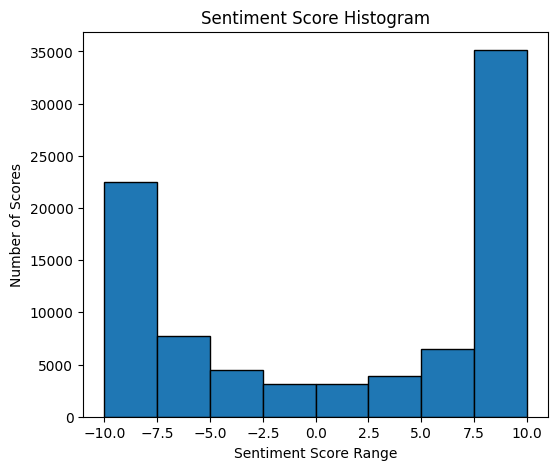

In [57]:
bin_edges = [-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10]

# Create a histogram with custom bins
plt.figure(figsize=(6, 5))
plt.hist(df5['Sentiment_Score'], bins=bin_edges, edgecolor='black')
plt.xlabel('Sentiment Score Range')
plt.ylabel('Number of Scores')
plt.title('Sentiment Score Histogram')
plt.xticks(bin_edges)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

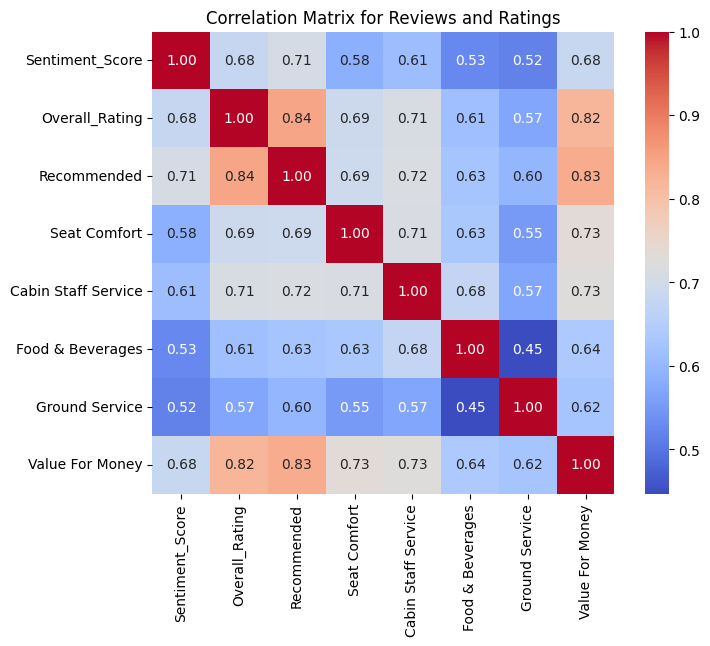

In [58]:
correlation_matrix = df.iloc[:, :8].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Reviews and Ratings')
plt.show()

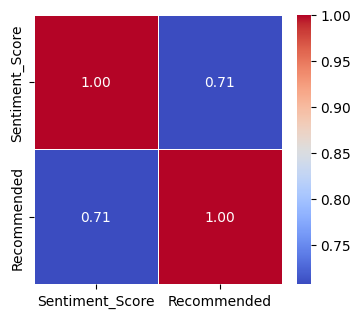

In [59]:
correlation_matrix = df5[["Sentiment_Score", "Recommended"]].corr()
plt.figure(figsize=(4, 3.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title("Correlation Matrix between Sentiment Score and Recommended")
plt.show()

In [60]:
y = df['Recommended']
df['Overall_Rating'] = pd.to_numeric(df['Overall_Rating'], errors='coerce')
X = df.drop(columns=['Recommended'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [61]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

Done
Done
Done
Done
Done
Done
Done
Done
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27025, number of negative: 33497
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 60522, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.446532 -> initscore=-0.214694
[LightGBM] [Info] Start training from score -0.214694
                      Feature  Importance
0             Sentiment_Score         879
1              Overall_Rating         519
6             Value For Money         369
3         Cabin Staff Service         327
5              Ground Service         291
2                Seat Comfort         249
4            Food & Beverages

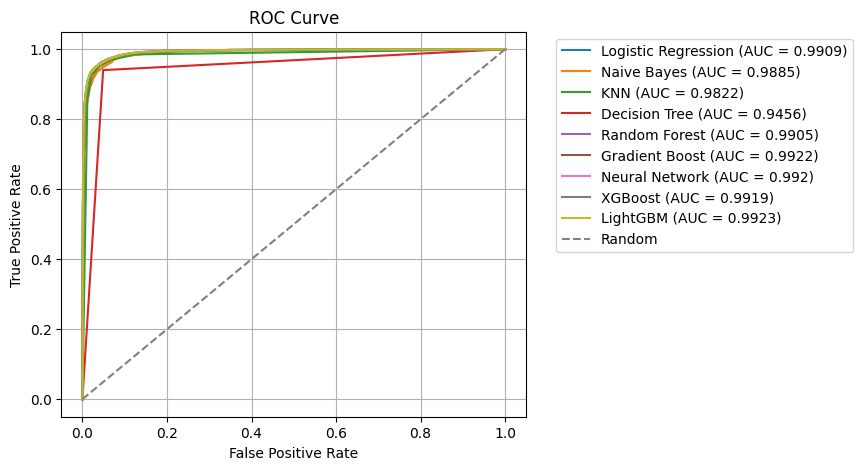

In [62]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Exe Time(s)", "AUC"]
plt.figure(figsize=(6, 5))

for model_name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    end_time = time.time()
    execution_time = end_time - start_time

    if(model_name == 'LightGBM'):
        feature_importance = model.feature_importances_
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print(feature_importance_df)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    auc_score = auc(fpr, tpr)

    table.add_row([model_name, round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4), round(specificity, 4), round(execution_time, 2), round(auc_score, 4)])

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {round(auc_score, 4)})')
    print("Done")

print(table)
print("---------------------------------------------------------------------------")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()